# Projeto Final: Classificação de Vegetação com tensorflow

Esse Projeto foi baseado na competição descrita abaixo:

> *To assess the impact of climate change on Earth's flora and fauna, it is vital to quantify how human activities such as logging, mining, and agriculture are impacting our protected natural areas. Researchers in Mexico have created the VIGIA project, which aims to build a system for autonomous surveillance of protected areas. A first step in such an effort is the ability to recognize the vegetation inside the protected areas. In this competition, you are tasked with creation of an algorithm that can identify a specific type of cactus in aerial imagery.*

To access this data, enter the [Aerial Cactus Identification](https://www.kaggle.com/competitions/aerial-cactus-identification/overview/description) competition.

## *Baixando dataset para o google Colab**

*Créditos [Github Repo](https://github.com/bnsreenu/python_for_microscopists/blob/master/Tips_tricks_35_loading_kaggle_data_to_colab.ipynb).*
1. Pacote do Kaggle

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp -r '/content/drive/MyDrive/ColabNotebooks/Kaggle-API-credentials' ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**Baixando dados**

In [ ]:
#@title
import os
os.environ['KAGGLE_USERNAME'] = 'danieliglesiasmelo'
os.environ['KAGGLE_KEY'] = '1b321f159c020fac8ce6172d889bbfad'

! kaggle competitions download -c aerial-cactus-identification

 42% 5.00M/12.0M [00:00<00:00, 19.5MB/s]
100% 12.0M/12.0M [00:00<00:00, 40.5MB/s]


In [ ]:
! unzip aerial-cactus-identification.zip

Archive:  aerial-cactus-identification.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [ ]:
! unzip train.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train/8244d4c9261b5eef48f824eb6c1cac22.jpg  
  inflating: train/8299bf72b460c2aa31b2638575f02d15.jpg  
  inflating: train/82d567c499ecaa91b6c2e770133a9b60.jpg  
  inflating: train/83783023acd84a1677b03ab37161d536.jpg  
  inflating: train/83a1badbbcb371fca0e1ab375ee38482.jpg  
  inflating: train/83a2fd5b6da24250c9d36929b92d8682.jpg  
  inflating: train/84d2c6a359eb54ccaf9343fc0751bb57.jpg  
  inflating: train/84e1dd237e748239096c1236206f4e4e.jpg  
  inflating: train/84e7b6b591daef3d2b3b3a1ee6eb172f.jpg  
  inflating: train/84eafaa6b8fe268471959b0fc2b54e5d.jpg  
  inflating: train/85109cfaadc701bb8200f883de99f569.jpg  
  inflating: train/8548824a57e5f3f41f95166e46a94638.jpg  
  inflating: train/855b813539adbea4d30f693990377f29.jpg  
  inflating: train/857a8140c9dd3f7988c1d42bacce2c04.jpg  
  inflating: train/86597916cc0e563d4345b5d619f9d32a.jpg  
  inflating: train/865d921187cebbf5b25d2e13764c14eb.jpg  
  inflating: 

## 2. Importando pacotes

In [ ]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [ ]:
cactusDf = pd.read_csv('/content/train.csv')
cactusDf.sample(10)

,id,has_cactus
6147,58bbe6b09c21a003e3f2048034df1123.jpg,1
9870,8de23ea7369e1e5eb81621b32f999671.jpg,1
16069,ea914d3e0118c6ff7088310755e85419.jpg,1
8088,741bdab522ed82cf6b69b4c9ac6eea1e.jpg,1
6161,58e82092c6067f86fa684ccdca224a6c.jpg,0
11124,a0b1a5e47c8de19b3b70b9edf01bd77a.jpg,1
9567,89bb8bb27e55906e1576cea1a751c411.jpg,1
15484,e1fe16f8f343525b0de31557aad72b55.jpg,1
2991,2a464ce658e49d427cdd0bb7454433d0.jpg,1
8876,7f811025b10059ea5ed538c5ab5e1057.jpg,1


### Análise Exploratória

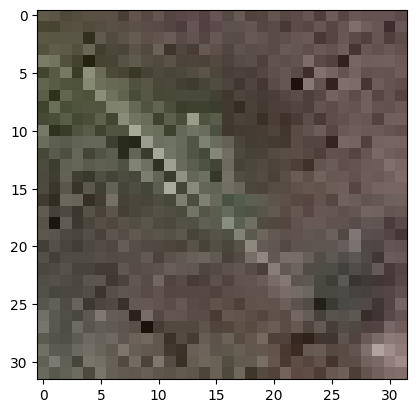

In [ ]:
plt.imshow(plt.imread('train/'+cactusDf['id'].iloc[10696]))

Classificação da imagem acima no Dataset:

In [ ]:
print('is there a cactus in the image above?')
print(cactusDf['has_cactus'].iloc[10696] == 1)

is there a cactus in the image above?
True


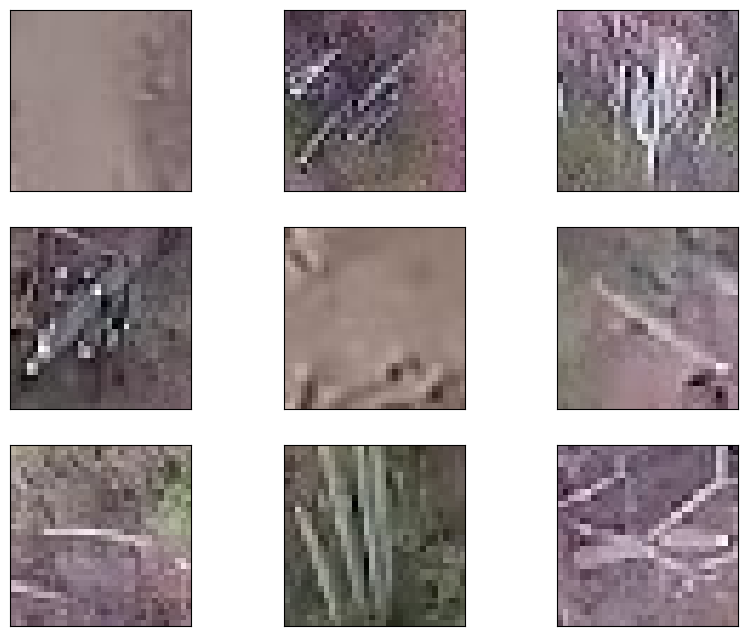

In [ ]:
from tensorflow.keras.preprocessing import image

image_dir =  list('train/'+ cactusDf['id'])

fig = plt.figure(figsize=(10, 8))
for idx, img in enumerate(np.random.choice(image_dir, 9)):
    ax = fig.add_subplot(3,3, idx+1, xticks=[], yticks=[])
    im = plt.imread(os.path.join(img))
    plt.imshow(im)

Distribuição dos dados no Dataset:

In [ ]:
cactusDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17500 non-null  object
 1   has_cactus  17500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 273.6+ KB


In [ ]:
cactusDf['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [ ]:
#percentage of data
cactusDf['has_cactus'].value_counts(normalize = True)

1    0.750629
0    0.249371
Name: has_cactus, dtype: float64

- Formato das imagens:

In [ ]:
# Test if all data has the same dimensions:
for num in np.random.choice(len(cactusDf), 10):
  print(plt.imread('train/'+cactusDf['id'][num]).shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


### Montando Rede

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Tratamento dos dados
1. Aplicação de One-hot encoding;
2. Lendo imagens como arrays;
3. Batch Noramlization;
4. Faço reshape de X e Y;

In [ ]:
from tensorflow.keras.utils import to_categorical

#defining y and converting to one-hot encoded labels
y = to_categorical(cactusDf['has_cactus'])

In [ ]:
paths = ['train/'+path for path in cactusDf['id']]

X = []

for path in paths:
  img = plt.imread(path)
  X.append(img)

In [ ]:
#normalization
np.max(X)

255

In [ ]:
batch = len(cactusDf)
X = np.asarray(X)
X =X/255
X.reshape(batch, 32, 32, 3)

array([[[[0.53333333, 0.54117647, 0.49019608],
         [0.5254902 , 0.53333333, 0.49019608],
         [0.57647059, 0.58039216, 0.54901961],
         ...,
         [0.59607843, 0.50588235, 0.52941176],
         [0.57647059, 0.48627451, 0.50980392],
         [0.61568627, 0.5254902 , 0.54901961]],

        [[0.48627451, 0.49411765, 0.44313725],
         [0.63137255, 0.63921569, 0.59607843],
         [0.61960784, 0.62352941, 0.59215686],
         ...,
         [0.63921569, 0.54901961, 0.57254902],
         [0.57647059, 0.49411765, 0.51372549],
         [0.56862745, 0.48627451, 0.50588235]],

        [[0.63137255, 0.63921569, 0.58823529],
         [0.62745098, 0.63529412, 0.59215686],
         [0.61960784, 0.62352941, 0.59215686],
         ...,
         [0.58823529, 0.50588235, 0.5254902 ],
         [0.63137255, 0.54901961, 0.56862745],
         [0.50588235, 0.42352941, 0.44313725]],

        ...,

        [[0.5372549 , 0.43529412, 0.47843137],
         [0.77254902, 0.67058824, 0.71372549]

In [ ]:
X.shape

(17500, 32, 32, 3)

#### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.18, random_state=42)

In [ ]:
#criando Neural Network:

model = Sequential()

#camadas
model.add(Conv2D(filters=32, kernel_size = (4,4), strides=(1,1), padding = 'valid',
                 input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size = (4,4), strides=(1,1), padding = 'valid',
                 input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#Dense Layers
model.add(Dense(units = 512, activation = "relu"))

model.add(Dense(units = 2, activation = "softmax"))

#Compile
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
e_stop = EarlyStopping(min_delta = 0.05,
                       patience = 10,
                       restore_best_weights= True)

In [ ]:
# fmodel fit
model.fit(x= X_train, y = y_train,
          validation_data= (X_val, y_val),
          callbacks = e_stop,
          batch_size=512, epochs = 20)

Epoch 1/20
29/29 [==============================] - 25s 821ms/step - loss: 0.3721 - accuracy: 0.8123 - val_loss: 0.3647 - val_accuracy: 0.8606
Epoch 2/20
29/29 [==============================] - 21s 728ms/step - loss: 0.2182 - accuracy: 0.9162 - val_loss: 0.1631 - val_accuracy: 0.9410
Epoch 3/20
29/29 [==============================] - 22s 766ms/step - loss: 0.1612 - accuracy: 0.9393 - val_loss: 0.1754 - val_accuracy: 0.9356
Epoch 4/20
29/29 [==============================] - 22s 750ms/step - loss: 0.1441 - accuracy: 0.9454 - val_loss: 0.1366 - val_accuracy: 0.9486
Epoch 5/20
29/29 [==============================] - 21s 719ms/step - loss: 0.1341 - accuracy: 0.9489 - val_loss: 0.1132 - val_accuracy: 0.9606
Epoch 6/20
29/29 [==============================] - 24s 819ms/step - loss: 0.1283 - accuracy: 0.9513 - val_loss: 0.3770 - val_accuracy: 0.8413
Epoch 7/20
29/29 [==============================] - 21s 733ms/step - loss: 0.1679 - accuracy: 0.9370 - val_loss: 0.1312 - val_accuracy: 0.9502

In [ ]:
predicts = model.predict(X_val)
class_predictions = np.argmax(predicts, axis = 1)

99/99 [==============================] - 1s 13ms/step


#### Fazendo avaliações

1. Confusion Matrix;
2. classification report;

Text(50.722222222222214, 0.5, 'True Labels')

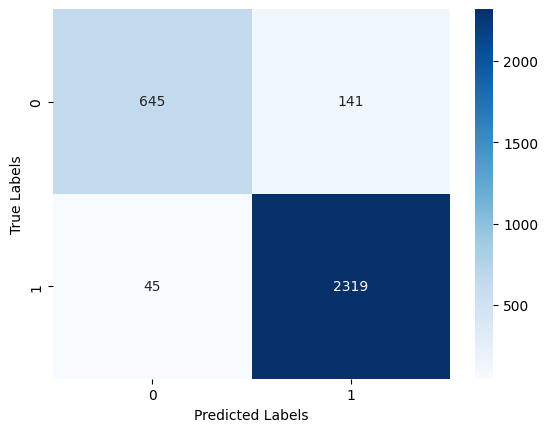

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#reverting y_val to binary, to fit classification_report and confusion_matrix
y_val_binary = np.argmax(y_val, axis=1)

#creating confusion matrix
sns.heatmap(
    confusion_matrix(y_val_binary, class_predictions),
    annot = True,
    fmt = 'd',
    cmap = 'Blues'
)

#naming axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
print(classification_report(y_val_binary, class_predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       786
           1       0.94      0.98      0.96      2364

    accuracy                           0.94      3150
   macro avg       0.94      0.90      0.92      3150
weighted avg       0.94      0.94      0.94      3150



# **Conclusão**

Considerando os resultados da Matriz de Confusão e do Classificatrion Report, fica claro que:

O modelo teve um ótimo desempenho ao prever tanto a presença quanto a ausência de cactos nas imagens, especialmente naquelas em que ele está presente. Considerando a importância da tarefa, o modelo deve ser implementado, pois raramente classifica incorretamente uma imagem que realmente tem cactos.
Embora o desempenho seja excelente, a 'ausência de cactos' na imagem é o aspecto que pode exigir melhorias. Como os dados têm muito mais imagens com cactos do que o contrário, ele tende a responder 'tem cactos'. Uma maneira de melhorar é gerar imagens de 'ausência de cactos' a partir das que estão no conjunto de dados, equilibrando assim as classes.

